In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import load_model


In [2]:
import tensorflow as tf
import numpy as np
import google.protobuf

print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)
print("Protobuf:", google.protobuf.__version__)


TensorFlow: 2.15.0
NumPy: 1.26.4
Protobuf: 3.20.3


In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

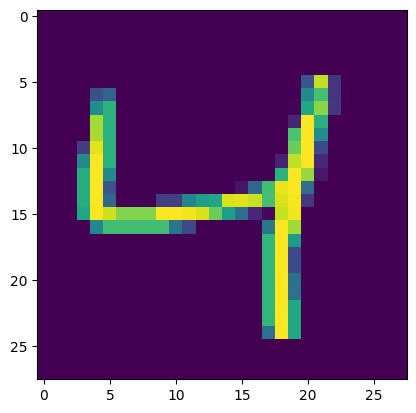

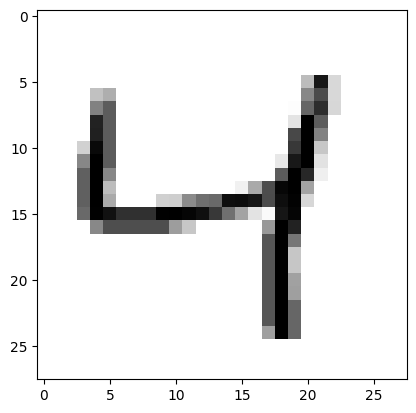

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2],cmap=plt.cm.binary)

In [7]:
x_train = tensorflow.keras.utils.normalize(x_train, axis = 1)
x_test = tensorflow.keras.utils.normalize(x_test, axis = 1)

In [8]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')


In [11]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10

1500/1500 [==============================] - 5s 3ms/step - loss: 0.3452 - val_loss: 0.1952
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1602 - val_loss: 0.1405
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1117 - val_loss: 0.1214
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0835 - val_loss: 0.1048
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0647 - val_loss: 0.0973
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0502 - val_loss: 0.0998
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0400 - val_loss: 0.1013
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0315 - val_loss: 0.0967
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0252 - val_loss: 0.0970
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.02

In [12]:
y_prob = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


In [13]:
print(y_test)

[7 2 1 ... 4 5 6]


In [14]:
y_prob[0]

array([9.3383443e-09, 2.6597960e-11, 2.2820534e-06, 5.7690657e-05,
       2.0607580e-13, 1.6365523e-09, 3.9244786e-16, 9.9993968e-01,
       1.7791743e-08, 3.3800799e-07], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis=1)
y_pred[0]

7

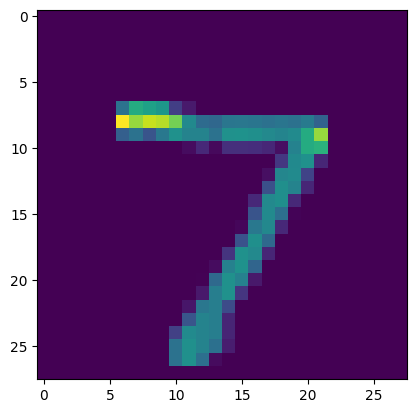

In [16]:
plt.imshow(x_test[0])

In [24]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


model.save('mnist_model.h5')


Epoch 1/5

1875/1875 [==============================] - 17s 9ms/step - loss: 0.1984 - accuracy: 0.9416 - val_loss: 0.0810 - val_accuracy: 0.9748
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0674 - accuracy: 0.9795 - val_loss: 0.0678 - val_accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0575 - val_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0629 - val_accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0772 - val_accuracy: 0.9781


c:\Users\Kushi\anaconda3\envs\tfenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
import gradio as gr
import numpy as np
def sketch_recognition(img_dict):
    img = img_dict['background']  # extract the actual RGBA image (H, W, 4)

    # Convert RGBA to RGB by dropping alpha channel
    img = img[:, :, :3]

    # Convert to tensor
    img = tf.convert_to_tensor(img)

    # Convert RGB to grayscale
    img = tf.image.rgb_to_grayscale(img)

    # Resize to 28x28
    img = tf.image.resize(img, [28, 28])

    # Normalize
    img = img / 255.0

    # Add batch dimension
    img = tf.expand_dims(img, axis=0)

    # Predict
    preds = model.predict(img)
    pred_class = np.argmax(preds, axis=1)[0]
    return str(pred_class)

In [37]:
gr.Interface(fn=sketch_recognition,inputs='sketchpad',outputs='text').launch(debug=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 21ms/step
Keyboard interruption in main thread... closing server.
